<a href="https://colab.research.google.com/github/esma-nur/Baykar-Case-AI_Calismasi/blob/main/Network_Karsilastirma2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Network_Karsilastirma
 Bir görüntü sınıflandırma derin öğrenme modeli oluşturmanız istenmektedir. Veri kümesi
 olarak Cifar-10 kullanılacaktır. Cifar-10 veri kümesi 60.000 görüntüden oluşan, 10 tane sınıfa
 sahip bir veri kümesidir. (Bknz: https://www.cs.toronto.edu/~kriz/cifar.html) Sizden istenilen 2
 ana görev bulunmaktadır:

  **2. Convolutional Neural Network bir network tasarımı**

 ● Model girdi olarak görsel almalı, çıktı olarak Cifar-10 veri kümesinde bulunan
 10 sınıftan birinin tahminini üretmelidir.

 ● ModelCifar-10 veri kümesi ile eğitilmelidir. Veri kümesinin %30’u test verisi
 olarak, geri kalanı eğitim verisi olarak kullanılmalıdır.

 ● Bumodeliniz sadece 5 adet convolutional hidden layerlardan ve 3 adet full
 connected layer’dan oluşmalıdır. Convolutional layer’ların dimension’ları 32’yi
 geçmemelidir. Kernel boyutu 3x3 olmalı, fully-connected layerlardaki
 perceptron (nöron) sayısı 128 adeti geçmemelidir.

 ● Batchsize değeri isteğe bağlı olarak belirlenebilir. Epoch sayısı 5 olacak
 şekilde ayarlanması gerekmektedir.

 ● Hidden layerlar arasına regularization işlemleri isteğe bağlı uygulanabilir.

 ● Modelbaşarısı makine öğrenmesi metriklerine göre raporlanmalıdır.
 (Confusion matrix, F1 Score vb.)

 ● Modeleğitim grafikleri çıkarılmalıdır.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# CIFAR-10 datasetini yükleyelim
from tensorflow.keras.datasets import cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)


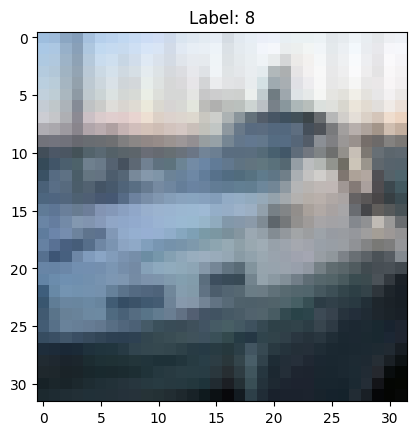

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Training data shape:", x_train.shape)

# İstenilen bir görüntü indexi
index = 2 # Örnek olarak ilk görüntüyü görüntüleyelim

# Görüntüyü ve etiketini al
image = x_test[index]
label = y_test[index]

# Görüntüyü göster
plt.imshow(image)
plt.title(f'Label: {label[0]}')  # Etiketi başlık olarak göster
plt.axis('on')  # Eksenleri gizle
plt.show()


In [4]:
# Veriyi normalize edin [0,1] aralığına
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Etiketleri one-hot encode yapın
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Eğitim verisini %70, test verisini %30 olacak şekilde ayarlayın
split_index = int(0.7 * len(x_train))
x_train, x_val = x_train[:split_index], x_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

In [6]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential()

# Giriş katmanı (Flatten - görüntüyü düzleştirir)
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# İlk fully connected hidden layer + Dropout
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))


# İkinci fully connected hidden layer + Dropout
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

# Üçüncü fully connected hidden layer + Dropout
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

# Dördüncü fully connected hidden layer + Dropout
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

#Besinci fully connected hidden layer + Dropout
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.3))

# Çıktı katmanı (10 sınıf için softmax aktivasyonu)
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Modeli derleyin
model.compile(optimizer='adam',  # Adam optimizasyon algoritması
              loss='categorical_crossentropy',  # Kayıp fonksiyonu
              metrics=['accuracy'])  # Doğruluk ölçütü

# Modeli eğitin
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_val, y_val))

# Modelin ağırlıklarını kaydedin
model.save_weights('model.weights.h5')

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1763 - loss: 2.2280 - val_accuracy: 0.3023 - val_loss: 1.9203
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2927 - loss: 1.9541 - val_accuracy: 0.3461 - val_loss: 1.8278
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3333 - loss: 1.8557 - val_accuracy: 0.3650 - val_loss: 1.7667
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3578 - loss: 1.7964 - val_accuracy: 0.3801 - val_loss: 1.7333
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3770 - loss: 1.7606 - val_accuracy: 0.3981 - val_loss: 1.6991


In [9]:
# Modeli özetleyelim
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,048 (4.86 MB)

 Trainable params: 424,682 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 849,366 (3.24 MB)

In [10]:
# Sınıf isimleri
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Modeli test verisi ile değerlendirme
y_pred_prob = model.predict(x_test)  # Olasılık tahminleri
y_pred = np.argmax(y_pred_prob, axis=1)  # Kesin sınıf tahminleri
y_true = np.argmax(y_test, axis=1)  # Gerçek sınıf etiketleri
# Confusion matrix ve sınıflandırma raporu
print("Classification Report:\n \n", classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Classification Report:
 
               precision    recall  f1-score   support

    Airplane       0.48      0.44      0.46      1000
  Automobile       0.51      0.50      0.50      1000
        Bird       0.28      0.31      0.29      1000
         Cat       0.32      0.11      0.16      1000
        Deer       0.38      0.18      0.24      1000
         Dog       0.43      0.33      0.37      1000
        Frog       0.35      0.62      0.45      1000
       Horse       0.46      0.44      0.45      1000
        Ship       0.43      0.69      0.53      1000
       Truck       0.46      0.49      0.48      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.39     10000
weighted avg       0.41      0.41      0.39     10000

Confusion Matrix:
 [[436  42  60   9   3  18  37  45 299  51]
 [ 32 498  16  17   4  18  36  28 168 183]
 [103  26 311  25  63  53 231  73  86  29]
 [ 54  39  95 110  31 201 

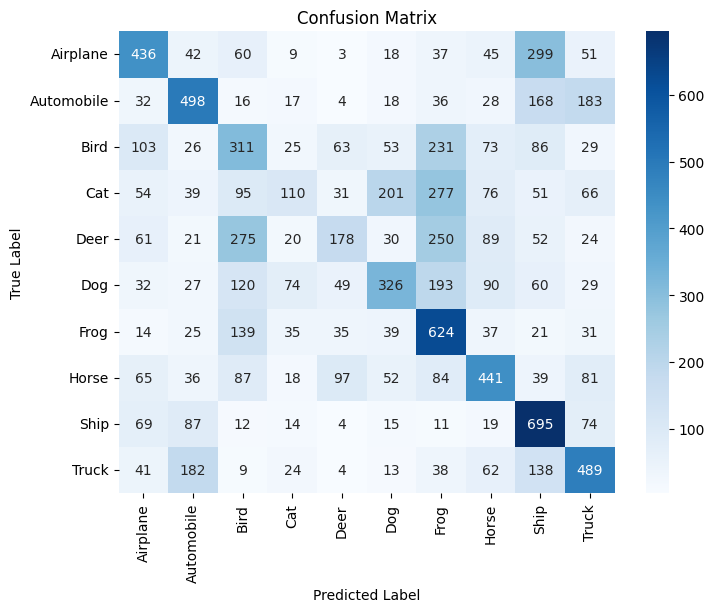

In [11]:

# Confusion matrix'in görselleştirilmesi
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

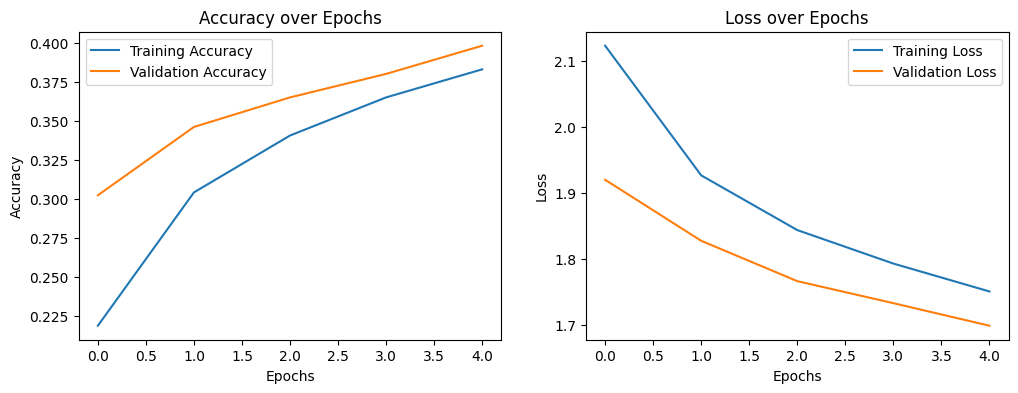

In [12]:
# Eğitim ve doğrulama doğruluklarını ve kayıplarını grafikleştirme
plt.figure(figsize=(12, 4))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


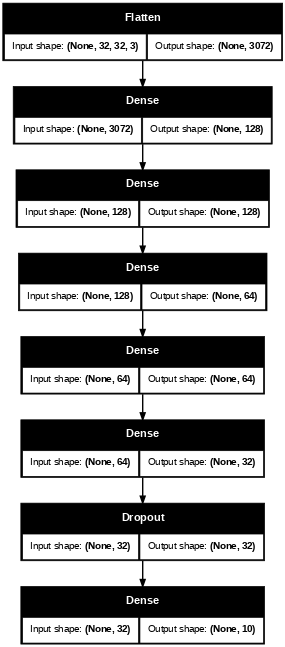

In [14]:
from tensorflow.keras.utils import plot_model

# Model mimarisini görselleştirme
plot_model(model, show_shapes=True, to_file='model_architecture.png', dpi=50)